In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("train.csv")
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

1. 생존자 수(count) 그래프 그리기

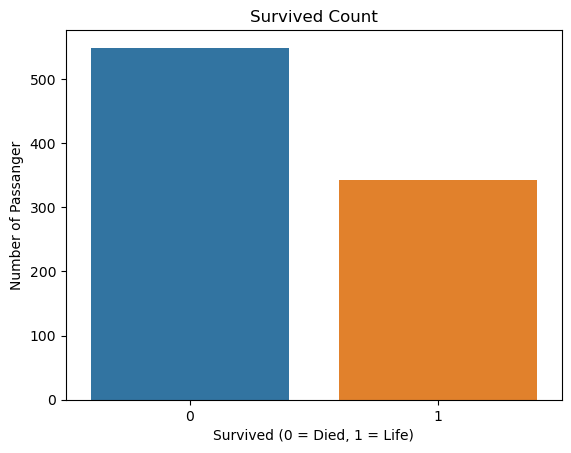

In [15]:
sns.countplot(x = 'Survived',data = df)
plt.title('Survived Count')
plt.xlabel('Survived (0 = Died, 1 = Life)')
plt.ylabel('Number of Passanger')
plt.show()

2. 성별(Sex)별 생존률 그래프 그리기

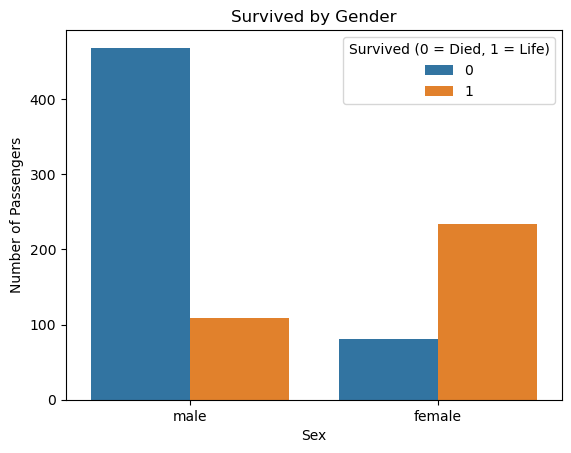

In [25]:
df['Survived'] = df['Survived'].astype(str)

sns.countplot(x = 'Sex', hue = 'Survived',data = df)
plt.title('Survived by Gender')
plt.xlabel('Sex')
plt.ylabel('Number of Passengers')
plt.legend(title = 'Survived (0 = Died, 1 = Life)')
plt.show()

[타이타닉 데이터 - 나이대별 생존률 분석 흐름]

In [28]:
# 1. 나이 구간(bins) 만들기
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]

# 2. 구간 이름(labels) 만들기
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

print(df[['Age','AgeGroup']])

      Age AgeGroup
0    22.0    20-30
1    38.0    30-40
2    26.0    20-30
3    35.0    30-40
4    35.0    30-40
..    ...      ...
886  27.0    20-30
887  19.0    10-20
888   NaN      NaN
889  26.0    20-30
890  32.0    30-40

[891 rows x 2 columns]


In [31]:
print(df['Survived'].dtype)

object


In [32]:
df['Survived'] = df['Survived'].astype(int)

In [36]:
agegroup_survival = df.groupby('AgeGroup',observed=False)['Survived'].mean()
print(agegroup_survival)

AgeGroup
0-10     0.593750
10-20    0.382609
20-30    0.365217
30-40    0.445161
40-50    0.383721
50-60    0.404762
60-70    0.235294
70-80    0.200000
Name: Survived, dtype: float64


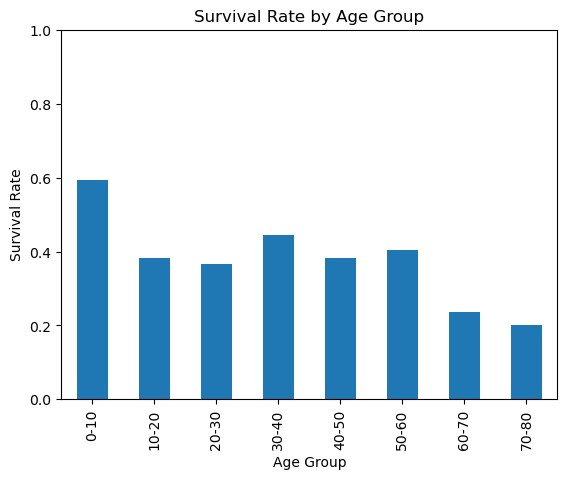

In [40]:
agegroup_survival.plot(kind='bar')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.ylim(0,1)
plt.show()